<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/geracao_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Fundamentos de Machine Learning Aplicado II (Turma 02)</center>

<center>

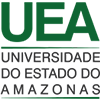

</center>

---

## <center>Código fonte do TCC</center>
##### <center>**Professora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## **<center>Análise histórica e clusterização de focos de Queimadas nos Biomas Brasileiros** </center>

### **<center>Dados Coletados e Geridos pelo INPE.** </center>

<center>O monitoramento de queimadas e incêndios florestais em imagens de satélites é particularmente útil para regiões remotas sem meios intensivos e locais de acompanhamento, condição esta que representa a situação geral do País. Para uma área com torres de observação guarnecidas continuamente e mantendo comunicação direta com brigadas de combate de fogo, os dados de satélite têm interesse marginal. 
A detecção dos focos de queima de vegetação nas imagens utiliza um mesmo modo de identificação de fogo, em todas regiões, todos os dias e por anos seguidos, o que permite análises temporais e espaciais da ocorrência do fogo que seriam impossíveis de outra forma, dada a precariedade, descontinuidade e diferença de métodos nas fontes de informação locais.  Em particular, os dados do "satélite de referência" permitem a comparação entre qualquer país do Planeta.</center>



[Dados disponíveis aqui.](https://queimadas.dgi.inpe.br/queimadas/bdqueimadas)




## <center>Os dados são coletados por uma constelação de satélites.</center>

[Representação artística em tempo real](http://stuffin.space/)


## **<center>Os Biomas Brasileiros** </center>


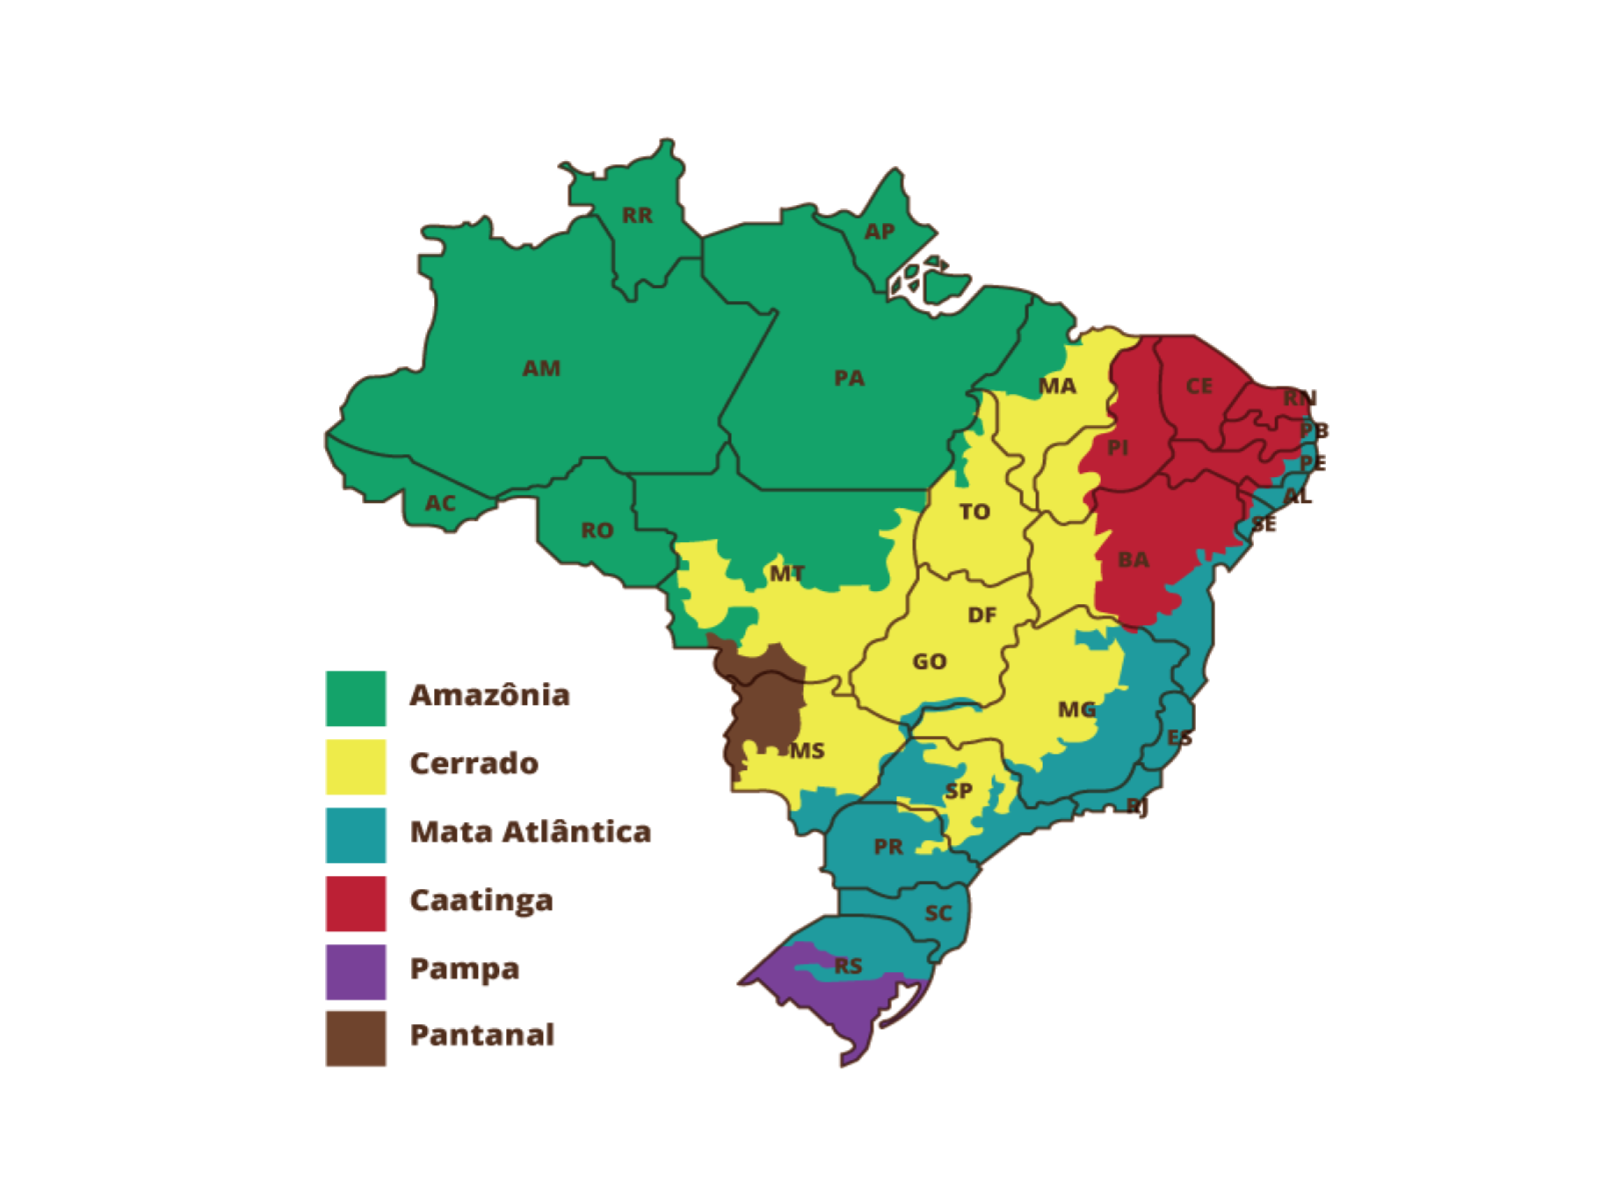



## Preparação do Ambiente

---



In [ ]:
# Pacotes instalados
!pip install geopandas
#!pip install contextily
#!pip install biokit
#!pip install plotly

In [1]:
## Bibliotecas de Tratamento de Dados
import pandas as pd
#import geopandas as gpd


## Carregamento e preparação do DataFrame de todos os Biomas

---



In [2]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Criando os DataFrames de focos de queimadas do Brasil
alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2019-01-01_2019-12-31.csv')
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2021-01-01_2021-12-31.csv')
alertas = [alertas_2019, alertas_2020, alertas_2021]
alertas_1921 = pd.concat(alertas)

In [4]:
alertas_1921

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,1.6,0.5,-3.60200,-49.96300,201.6
1,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63000,-52.25500,47.5
2,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63100,-52.26400,17.4
3,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.64200,-52.26500,12.4
4,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0.0,0.3,0.0,-3.65100,-58.25400,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
184076,2021/08/29 17:05:00,AQUA_M-T,Brasil,TOCANTINS,LAGOA DA CONFUSAO,Cerrado,88.0,0.0,1.0,-10.87773,-50.33506,246.6
184077,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,104.0,0.0,1.0,-12.37030,-51.13305,10.4
184078,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,NOVO SANTO ANTONIO,Cerrado,103.0,0.0,1.0,-12.34445,-51.14636,150.6
184079,2021/08/29 17:07:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,0.0,0.5,-4.08141,-50.88046,19.3


## Carregamento e preparação do DataFrame somente do Bioma Amazônia

---



In [5]:
alertas_amazonia = alertas_1921[alertas_1921['bioma'] == 'Amazonia']

In [6]:
alertas_amazonia

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2.0,1.6,0.5,-3.60200,-49.96300,201.6
1,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63000,-52.25500,47.5
2,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.63100,-52.26400,17.4
3,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0.0,0.5,0.2,-3.64200,-52.26500,12.4
4,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0.0,0.3,0.0,-3.65100,-58.25400,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
184063,2021/08/29 18:45:00,AQUA_M-T,Brasil,AMAZONAS,BOCA DO ACRE,Amazonia,10.0,0.0,1.0,-9.15154,-68.21212,82.2
184064,2021/08/29 18:45:00,AQUA_M-T,Brasil,ACRE,FEIJO,Amazonia,0.0,0.0,0.4,-8.95060,-70.55329,58.9
184072,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,97.0,0.0,1.0,-11.26925,-52.74310,37.1
184075,2021/08/29 17:05:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Amazonia,105.0,0.0,1.0,-11.22230,-52.71341,47.5


## Geração dos DataFrame dos alertas de todos os Biomaas e somente dos alertas do Bioma Amazônia

---



In [8]:
# Todos os biomas
alertas_1921.to_csv(r'//content/drive/MyDrive/TCC/dataset/novos/alertas_biomas.csv', encoding = 'utf-8', sep =';', header=True, index=True) 

In [9]:
# Biomas Amazônia
alertas_amazonia.to_csv(r'//content/drive/MyDrive/TCC/dataset/novos/alertas_biomas.csv', encoding = 'utf-8', sep =';', header=True, index=True) 